In [123]:
import pandas as pd
import seaborn as sns
import numpy as np

import sklearn.naive_bayes as sknb
import sklearn.model_selection as skms
import sklearn.metrics as skmetrics

In [94]:
df = pd.read_csv("../unsynced-data/spotify-streams.csv").drop(["Unnamed: 0", "Unnamed: 1", "Unnamed: 2"], axis=1)

In [95]:
pd.options.display.max_columns = None
df.head()

,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,4/26/2024,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,NaN,0
1,5/4/2024,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,NaN,1
2,3/19/2024,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,NaN,0
3,1/12/2023,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,NaN,0
4,5/31/2024,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,NaN,NaN,1.127639e+08,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,NaN,1


In [96]:
df = df.drop(["Release Date", "ISRC", "Track Score"], axis=1)
df.head()

,All Time Rank,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,1,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,NaN,0
1,2,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,NaN,1
2,3,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,NaN,0
3,4,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,NaN,0
4,5,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,NaN,NaN,1.127639e+08,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,NaN,1


In [97]:
for col in df.columns:
    if df[col].isna().sum() > 500:
        df = df.drop(col, axis=1)
print(len(df))
df.isna().sum()

4600


All Time Rank               0
Spotify Streams           113
Spotify Playlist Count     70
Spotify Playlist Reach     72
YouTube Views             308
YouTube Likes             315
AirPlay Spins             498
Explicit Track              0
dtype: int64

In [98]:
for col in df.columns:
    df = df[pd.notna(df[col])]

print(len(df))
df.isna().sum()

3938


All Time Rank             0
Spotify Streams           0
Spotify Playlist Count    0
Spotify Playlist Reach    0
YouTube Views             0
YouTube Likes             0
AirPlay Spins             0
Explicit Track            0
dtype: int64

In [99]:
median = int(np.round(np.median(df["All Time Rank"])))
median

2262

In [100]:
df["top_half"] = df["All Time Rank"].apply(lambda entry: 1 if entry < median else 0)
median

2262

In [101]:
df.sample(10)

,All Time Rank,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,YouTube Views,YouTube Likes,AirPlay Spins,Explicit Track,top_half
3626,3607,1.275036e+09,143693.0,85520811.0,2.646583e+08,3696633.0,86998.0,0,0
4296,4270,5.503365e+06,1424.0,893924.0,1.399008e+08,1292201.0,96.0,0,0
4313,4286,2.312986e+08,49800.0,5948309.0,1.092505e+08,862054.0,1016.0,1,0
384,385,8.680915e+08,86379.0,31261057.0,1.591945e+09,7916193.0,36028.0,1,1
2901,2892,2.030817e+08,47164.0,7286295.0,4.093113e+08,2277370.0,324.0,0,0
654,649,1.914882e+08,46669.0,12795882.0,2.052923e+08,1160425.0,18155.0,0,1
2721,2708,9.010070e+05,18.0,713.0,3.100858e+07,437421.0,5.0,0,0
186,187,4.068750e+08,85930.0,45178662.0,3.985019e+07,427973.0,4395.0,1,1
1449,1443,2.223732e+08,24491.0,38080713.0,3.116163e+07,637860.0,31410.0,0,1
3705,3687,1.429205e+09,151855.0,83732411.0,1.560154e+08,1540316.0,74545.0,0,0


In [119]:
top_half_label = df["top_half"]
explicit_label = df["Explicit Track"]
data = df.copy().drop(["All Time Rank", "Explicit Track", "top_half"], axis=1)


,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,YouTube Views,YouTube Likes,AirPlay Spins
0,3.904709e+08,30716.0,196631588.0,8.427475e+07,1713126.0,40975.0
1,3.237039e+08,28113.0,174597137.0,1.163470e+08,3486739.0,40778.0
2,6.013093e+08,54331.0,211607669.0,1.225991e+08,2228730.0,74333.0
3,2.031281e+09,269802.0,136569078.0,1.096101e+09,10629796.0,1474799.0
4,1.070349e+08,7223.0,151469874.0,7.737396e+07,3670188.0,12185.0


In [118]:
x_train, x_test, y_train, y_test = skms.train_test_split(data, top_half_label)

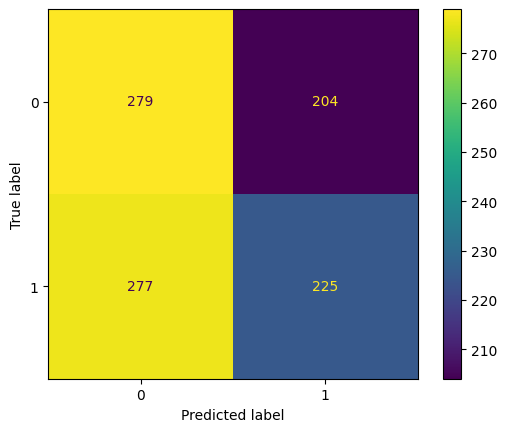

In [125]:
mn_nb = nb.MultinomialNB()
mn_nb.fit(x_train, y_train)
y_pred = mn_nb.predict(x_test)
confusion_matrix = skmetrics.confusion_matrix(y_test, y_pred)
skmetrics.ConfusionMatrixDisplay(confusion_matrix).plot()

,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,YouTube Views,YouTube Likes,AirPlay Spins
1301,7.882827e+08,139716.0,24601490.0,872454191.0,11385109.0,486.0
2596,1.256488e+09,158078.0,59355964.0,721653474.0,5562953.0,7063.0
368,1.432830e+09,139215.0,53934095.0,778340255.0,10401273.0,599336.0
1866,9.994684e+07,9128.0,36536793.0,4417747.0,54887.0,10826.0
2422,5.305800e+04,117.0,4155.0,326994714.0,529872.0,7.0
...,...,...,...,...,...,...
736,9.526269e+08,151446.0,27674084.0,195696821.0,2597296.0,113898.0
3219,3.434304e+07,5156.0,7788420.0,11778991.0,285840.0,215.0
2560,3.891200e+07,9619.0,2346613.0,3915932.0,59814.0,46.0
4236,9.790268e+07,29131.0,4436551.0,201368546.0,3657987.0,2981.0
